<a href="https://colab.research.google.com/github/azrazainol/STQD6324_Assignment_02/blob/main/STQD6324_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A'zra Zulaikha Binti Zainol
P137262

# **2006 Flight Data**

This analysis provides insights on airline performance based on flight data from 2006. The insights are extracted using Hive (SQL) and is analysed below through visualisation.

When purchasing airline tickets, people would most likely go for times or airlines with low cancellation and delay rates. Due to the that, at the end of the analysis, a logistic regression model is trained using the data to find whether certain conditions may be suitable or not to purchase flight tickets so that flight delays or cancellations may be avoided.


The csv files for the visualisation section can be downloaded [here](https://drive.google.com/drive/folders/1UeYVBF3JlUuG4M0DPaVwzdJxEDLj8d2c?usp=drive_link) and uploaded to Google Drive under the folder name 'hdfs' to run the code smoothly.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
flights = pd.read_csv('/content/drive/MyDrive/hdfs/2006.csv')
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141917,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,NaN,0,0,0,0,0,0
7141918,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,NaN,0,30,0,32,0,0
7141919,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,NaN,0,0,0,0,0,0
7141920,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,NaN,0,0,0,0,0,0


# **Import HDFS Files**

The csv files retreived from the extracting insights using Hive are loaded below and used for visualisation.

To use the code provided below, the [2006.csv](https://drive.google.com/file/d/1ApzHiJ85TiCl4GRL959EGXBBxGdTkx35/view?usp=drive_link) file must be uploaded to Hive.

In [ ]:
"""
Question 1

1_ot_timeOfDay

-- Optimal times of day
SELECT deptime, AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 2006
GROUP BY deptime
ORDER BY avg_arrdelay;

1_ot_month

-- Optimal times of the year (by month)
SELECT month, AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 2006
GROUP BY month
ORDER BY avg_arrdelay;

1_ot_dayOfWeek

-- Optimal days of the week
SELECT dayofweek, AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 1995
GROUP BY dayofweek
ORDER BY avg_arrdelay;

1_ot_season

-- Optimal times of the year (by season)
SELECT
    CASE
        WHEN month IN (12, 1, 2) THEN 'Winter'
        WHEN month IN (3, 4, 5) THEN 'Spring'
        WHEN month IN (6, 7, 8) THEN 'Summer'
        WHEN month IN (9, 10, 11) THEN 'Autumn'
    END AS season,
    AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 2006
GROUP BY CASE
    WHEN month IN (12, 1, 2) THEN 'Winter'
    WHEN month IN (3, 4, 5) THEN 'Spring'
    WHEN month IN (6, 7, 8) THEN 'Summer'
    WHEN month IN (9, 10, 11) THEN 'Autumn'
END
ORDER BY avg_arrdelay;



Question 2

2_delay_factor

SELECT
    AVG(weatherdelay) AS avg_weatherdelay,
    AVG(nasdelay) AS avg_nasdelay,
    AVG(securitydelay) AS avg_securitydelay,
    AVG(lateaircraftdelay) AS avg_lateaircraftdelay,
    AVG(carrierdelay) AS avg_carrierdelay
FROM flights
WHERE year = 2006;



Question 3

3_cancellation_code

SELECT cancellationcode, COUNT(*) AS cancellation_count
FROM flights
WHERE year = 2006 AND cancelled = 1
GROUP BY cancellationcode
ORDER BY cancellation_count DESC;



Question 4

4_flightnum_cancellation

-- Frequent cancellations
SELECT flightnum, COUNT(*) AS cancellation_count
FROM flights
WHERE year = 2006 AND cancelled = 1
GROUP BY flightnum
ORDER BY cancellation_count DESC;

4_flightnum_delay_count

-- Frequent and significant delays
SELECT flightnum, COUNT(*) AS delay_count, AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 2006 AND arrdelay > 0
GROUP BY flightnum
ORDER BY delay_count DESC, avg_arrdelay DESC;

"""

In [4]:
# 1
ot_hour = pd.read_csv('/content/drive/MyDrive/hdfs/1_ot_timeOfDay.csv')
ot_day = pd.read_csv('/content/drive/MyDrive/hdfs/1_ot_dayOfWeek.csv')
ot_day = ot_day.sort_values(by='dayofweek', ascending=True)
ot_month = pd.read_csv('/content/drive/MyDrive/hdfs/1_ot_month.csv')
ot_season = pd.read_csv('/content/drive/MyDrive/hdfs/1_ot_season.csv')

# 2
delay_factor = pd.read_csv('/content/drive/MyDrive/hdfs/2_delay_factor.csv')

# 3
cancellation_factor = pd.read_csv('/content/drive/MyDrive/hdfs/3_cancellation_code.csv')

# 4
frequent_cancellation = pd.read_csv('/content/drive/MyDrive/hdfs/4_flightnum_cancellation.csv')
frequent_delay = pd.read_csv('/content/drive/MyDrive/hdfs/4_flightnum_delay_count.csv')

In [5]:
rename_dict = {'avg_weatherdelay': 'Weather Delay',
               'avg_nasdelay': 'NAS Delay',
               'avg_securitydelay': 'Security Delay',
               'avg_lateaircraftdelay': 'Late Aircraft Delay',
               'avg_carrierdelay': 'Carrier Delay'}

delay_factor = delay_factor.rename(columns=rename_dict)

delay_factor = delay_factor.T.reset_index()
delay_factor.columns = ['Delay Type', 'Average Delay (minutes)']
delay_factor = delay_factor.sort_values(by='Average Delay (minutes)', ascending=False)

In [6]:
cancellation_mapping = {'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}
cancellation_factor['cancellation_reason'] = cancellation_factor['cancellationcode'].map(cancellation_mapping)

In [7]:
top_40_cancellations = frequent_cancellation.head(40)
top_40_cancellations['flightnum'] = top_40_cancellations['flightnum'].astype(str);
top_20_delays = frequent_delay.head(20)
top_20_avg_delays = frequent_delay.sort_values(by='avg_arrdelay', ascending=False).head(20)

<ipython-input-7-fe1d2669fb7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_40_cancellations['flightnum'] = top_40_cancellations['flightnum'].astype(str);


In [ ]:
"""
EXTRA INSIGHTS

E_ts_analysis

-- Monthly cancellations
SELECT month, COUNT(*) AS total_flights, SUM(cancelled) AS cancelled_flights,
       (SUM(cancelled) / COUNT(*)) * 100 AS cancellation_rate
FROM flights
WHERE year = 2006
GROUP BY month
ORDER BY month;


E_delay_by_carrier

SELECT uniquecarrier, AVG(arrdelay) AS avg_arrdelay
FROM flights
WHERE year = 2006
GROUP BY uniquecarrier
ORDER BY avg_arrdelay;


E_cancel_by_carrier

SELECT uniquecarrier, COUNT(*) AS total_flights, SUM(cancelled) AS cancelled_flights,
       (SUM(cancelled) / COUNT(*)) * 100 AS cancellation_rate
FROM flights
WHERE year = 2006
GROUP BY uniquecarrier
ORDER BY cancellation_rate DESC;

"""

In [8]:
# extra insights
avg_cancel_month = pd.read_csv('/content/drive/MyDrive/hdfs/E_ts_analysis.csv')
avg_delay_carrier = pd.read_csv('/content/drive/MyDrive/hdfs/E_delay_by_carrier.csv')
avg_cancel_carrier = pd.read_csv('/content/drive/MyDrive/hdfs/E_cancel_by_carrier.csv')

In [9]:
avg_delay_carrier = avg_delay_carrier.sort_values(by='avg_arrdelay', ascending=False)
top10_avg_delay_carrier = avg_delay_carrier.head(10)

avg_cancel_carrier = avg_cancel_carrier.sort_values(by='cancellation_rate', ascending=False)
top10_avg_cancel_carrier = avg_cancel_carrier.head(10)

# **Visualisation**

### **Average Arrival Delay**

Average arrival delay by:
- departure time
- day of the week
- month
- season

The window below shows four plots for avergae arrival delays based on departure time, day of the week, month and season.

Based on the departure time, it seems that flights that depart during the early hours of the morning (between 12AM until 5AM) have a higher average arrival delay time. The flights during those hours should be avoided to lower risks of flight delay. The rest of the hours have a similar arrival delay on average so any hour aside from 12AM - 5AM seem to be fine.

The second plot shows that on average, flights on the 4th (Thursday) and 5th (Friday) day of the week have an average arrival delay of approximately 11 and 13 minutes respectively which is the highest among other days of the week. Flights on the 6th (Saturday) and 2nd (Tuesday) day of the week have the lowest average arrival delay at about 5 and 6 minutes respectively. Based on that, it is suggested that customers purchase flights that arrive at the destination on Saturday or Tuesday and avoid flying on Thursday and Friday.

The third plot shows that the average arrival delay is the highest in June, July and December where all three have an average arrival delay above 11 minutes. The months with the lowest average are January, April and May with an average below 7 minutes each. It shows that it is best to fly in January, April and May while June, July and December should be avoided. The delay in those months may be due to the extreme weather such as rainy days during Summer season or snow storms during the Winter season. However, before concluding the reason, it is best to see the average delay based on seasons which is shown in the final plot.

The final plot shows that the most problematic season when it comes to arrival delays is Summer followed by Autumn. This is unlike what was seen when the months are compared individually earlier. Hence, although it is true that two months from the Summer season have the highest average arrival delay, the individual months in Autumn seem to have a lower arrival delay average compared to December individually. December is known to be when snow starts falling which may be the reason why it is the only month from Winter that has a high average arrival delay.

To conclude from the average arrival delay part, it is best to fly between dawn until midnight on Saturdays or Tuesdays during January or any month of Spring. It is best to avoid flying after midnight until dawn on Thursdays and Fridays and it is best to avoid extreme weathers such as early Summer or December.

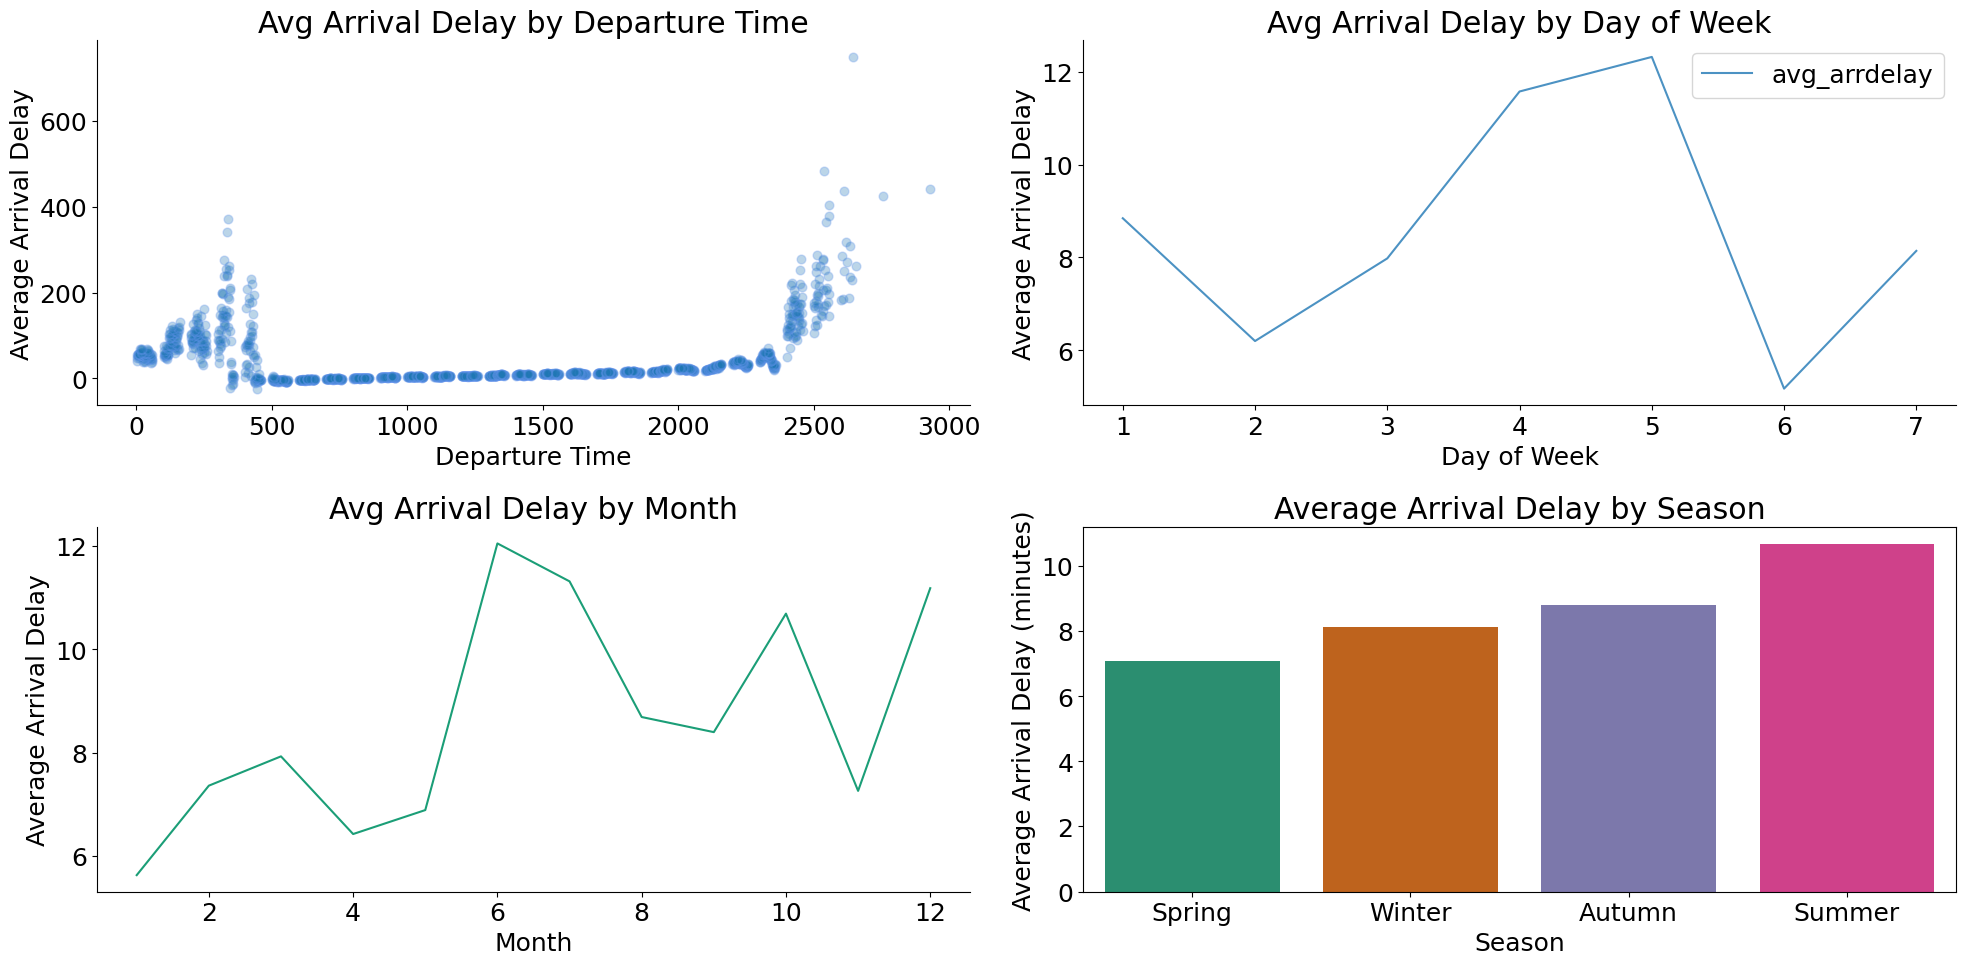

In [10]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Plot 1: Average Arrival Delay by Departure Time
plt.subplot(2, 2, 1)
ot_hour.plot(kind='scatter', x='deptime', y='avg_arrdelay', s=40, alpha=.3, marker='o', facecolor='blue',  edgecolor='cornflowerblue', ax=plt.gca())
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Avg Arrival Delay by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Arrival Delay')

# Plot 2: Average Arrival Delay by Day of Week
plt.subplot(2, 2, 2)
ot_day.plot(kind='line', x='dayofweek', y='avg_arrdelay', alpha=.8, ax=plt.gca())
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Avg Arrival Delay by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Arrival Delay')

# Plot 3: Average Arrival Delay by Month
plt.subplot(2, 2, 3)
df_sorted = ot_month.sort_values('month', ascending=True)
palette = list(sns.color_palette('Dark2'))
plt.plot(df_sorted['month'], df_sorted['avg_arrdelay'], label='Avg Arrival Delay', color=palette[0])
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Avg Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')

# Plot 4: Average Arrival Delay by Season
plt.subplot(2, 2, 4)
sns.barplot(data=ot_season, y='avg_arrdelay', x='season', hue='season',palette='Dark2')
plt.title('Average Arrival Delay by Season')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xlabel('Season')

plt.tight_layout()
plt.show();

### **Delay and Cancellation Reasons**

The delay and cancellation rate/number by reason:
- late aircraft (delay only)
- National Air System (NAS)
- carrier
- weather
- security

In this section, the reasons for delay and cancellation are examined. Two plots can be seen below for delay on the left and and cancellation on the right.

Based on the plot for delay reasons, the least common reason is security delay while the most common reason for delay is late aircraft. Aircrafts need to be prepared before flying and most commercial airlines would try to keep their air time (which means time flying) as high as possible to maximise profit. This means that airline companies would keep the time to prepare between flights as short as possible. So when late aircraft happens, it would affect the other flight schedules.

The next plot for cancel reasons also show that security is the least common reason for flight cancellation meanwhile carrier problems is the most common cause for flight cancellation. Security is the least common reason for both delayed and cancelled flights nearing almost 0 in both categories. This may be due to security being the most efficient because it is well monitored in most airports.

This analysis should help companies and airports understand where they should be more attentive towards to avoid inconveniences towards customers such as giving more time for airplane preparation between flights. Customers may also use this analysis to make sure that they choose the right carriers which do not cause frequent cancellations as the main cause of cancellations is due to carriers and not due to airports.

<ipython-input-11-9284560db729>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], data=delay_factor, y='Average Delay (minutes)', x='Delay Type', palette='viridis')
<ipython-input-11-9284560db729>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], data=cancellation_factor, x='cancellation_reason', y='cancellation_count', palette='viridis')


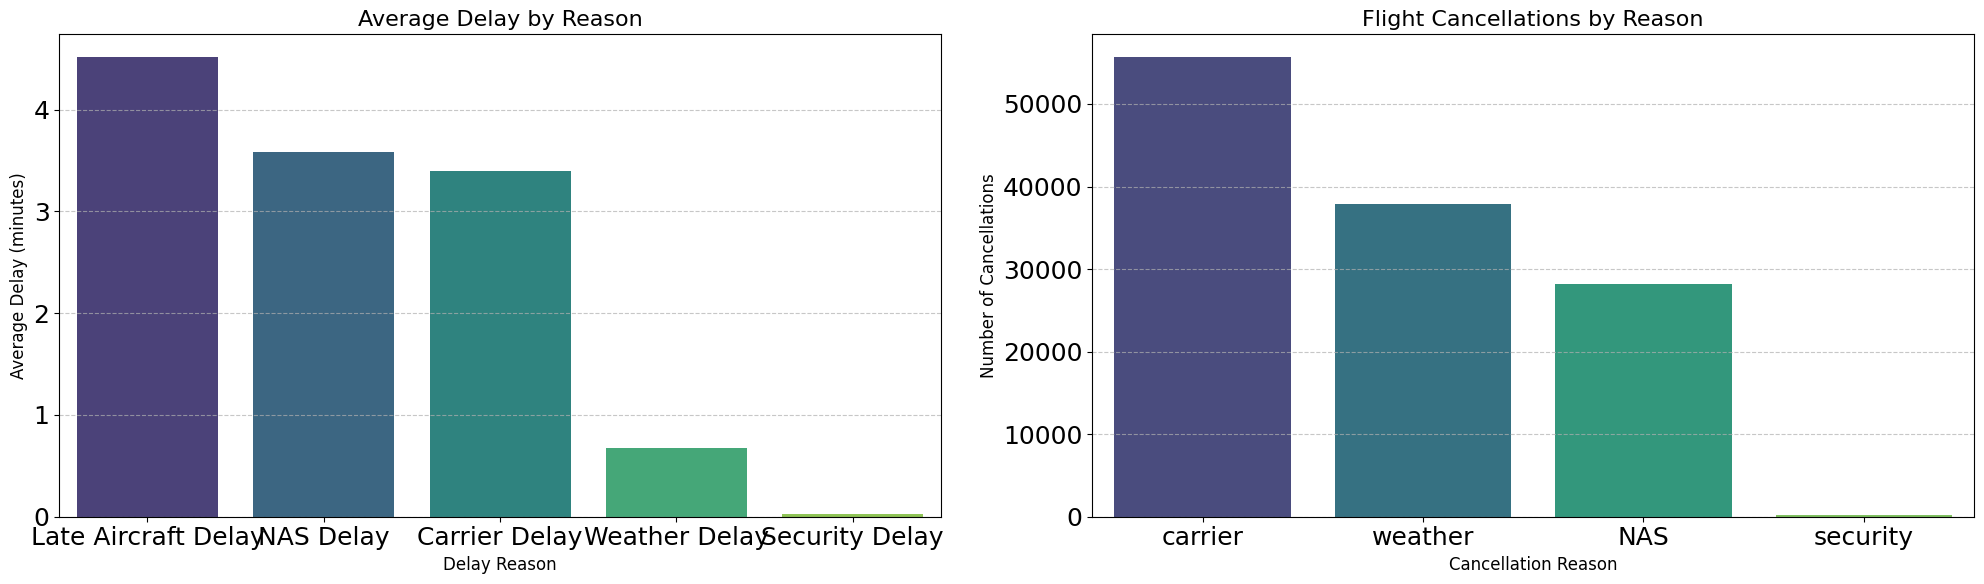

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.rcParams.update({'font.size': 12, 'lines.markersize': 12})

# Plot Average Delay by Type
sns.barplot(ax=axes[0], data=delay_factor, y='Average Delay (minutes)', x='Delay Type', palette='viridis')
axes[0].set_title('Average Delay by Reason', fontsize=16)
axes[0].set_ylabel('Average Delay (minutes)', fontsize=12)
axes[0].set_xlabel('Delay Reason', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Flight Cancellations by Reason
sns.barplot(ax=axes[1], data=cancellation_factor, x='cancellation_reason', y='cancellation_count', palette='viridis')
axes[1].set_title('Flight Cancellations by Reason', fontsize=16)
axes[1].set_xlabel('Cancellation Reason', fontsize=12)
axes[1].set_ylabel('Number of Cancellations', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

### **Delay Insights Based on Flight Number**

- Top 20 Flights with Highest Average Delay
- Average Delay for Top 20 Flights with Highest Delay Count
- Delay Count for Top 20 Flights with Highest Average Delay
- Top 20 Flights with Highest Delay Count

After looking into things that companies may do to improve their services, customers should also have the power to make the best decisions for themeselves which is in terms of choosing the right flight number when purchasing tickets. The plots below show the flight numbers to avoid based on the average delays (left side) and the number of times the flight number has experienced delay (right side).

Based on the plot for flight numbers with the highest average delay, flight number 9024 has the highest avergae delay reaching almost 1400 minutes but it has only experienced delay once when referred to the number of times it has experienced delay. This may be a one time occurrence for flight number 9024 and the chances of it experiencing delay in general may be pretty low. the other flights with high average delay duration record average below 200 minutes each whichis around 3 hours and a half. The delay occurrence seems to be most frequent for flight numbers 6810, 7363 and 7458 all occurring more than 100 times each.

The right side plots show that flights with high number of delays seem to delay between 25 to 35 minutes. Among the flights with high delay count, the highest are flight numbers 357, 490 and 368. These flight numbers have an average delay duration of about 32, 25 and 34 minutes respectively. Flight numbers 357 and 368 are on the higher spectrum for average delay duration among these flights.

Based on the explanation above, the flight numbers to avoid when purchasing tickets are 6810, 7363 and 7458 to avoid long delays. Flight numbers 357 and 368 should be avoided as there are high chances of getting delayed when choosing those flight numbers.

<ipython-input-33-9b50fe077070>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_avg_delays, y='avg_arrdelay', x='flightnum', palette='magma')
<ipython-input-33-9b50fe077070>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_delays, y='avg_arrdelay', x='flightnum', palette='viridis')
<ipython-input-33-9b50fe077070>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_avg_delays, y='delay_count', x='flightnum', palette='magma')
<ipython-input-33-9b50fe077070>:23: FutureWarning: 

Passing `palette` without assi

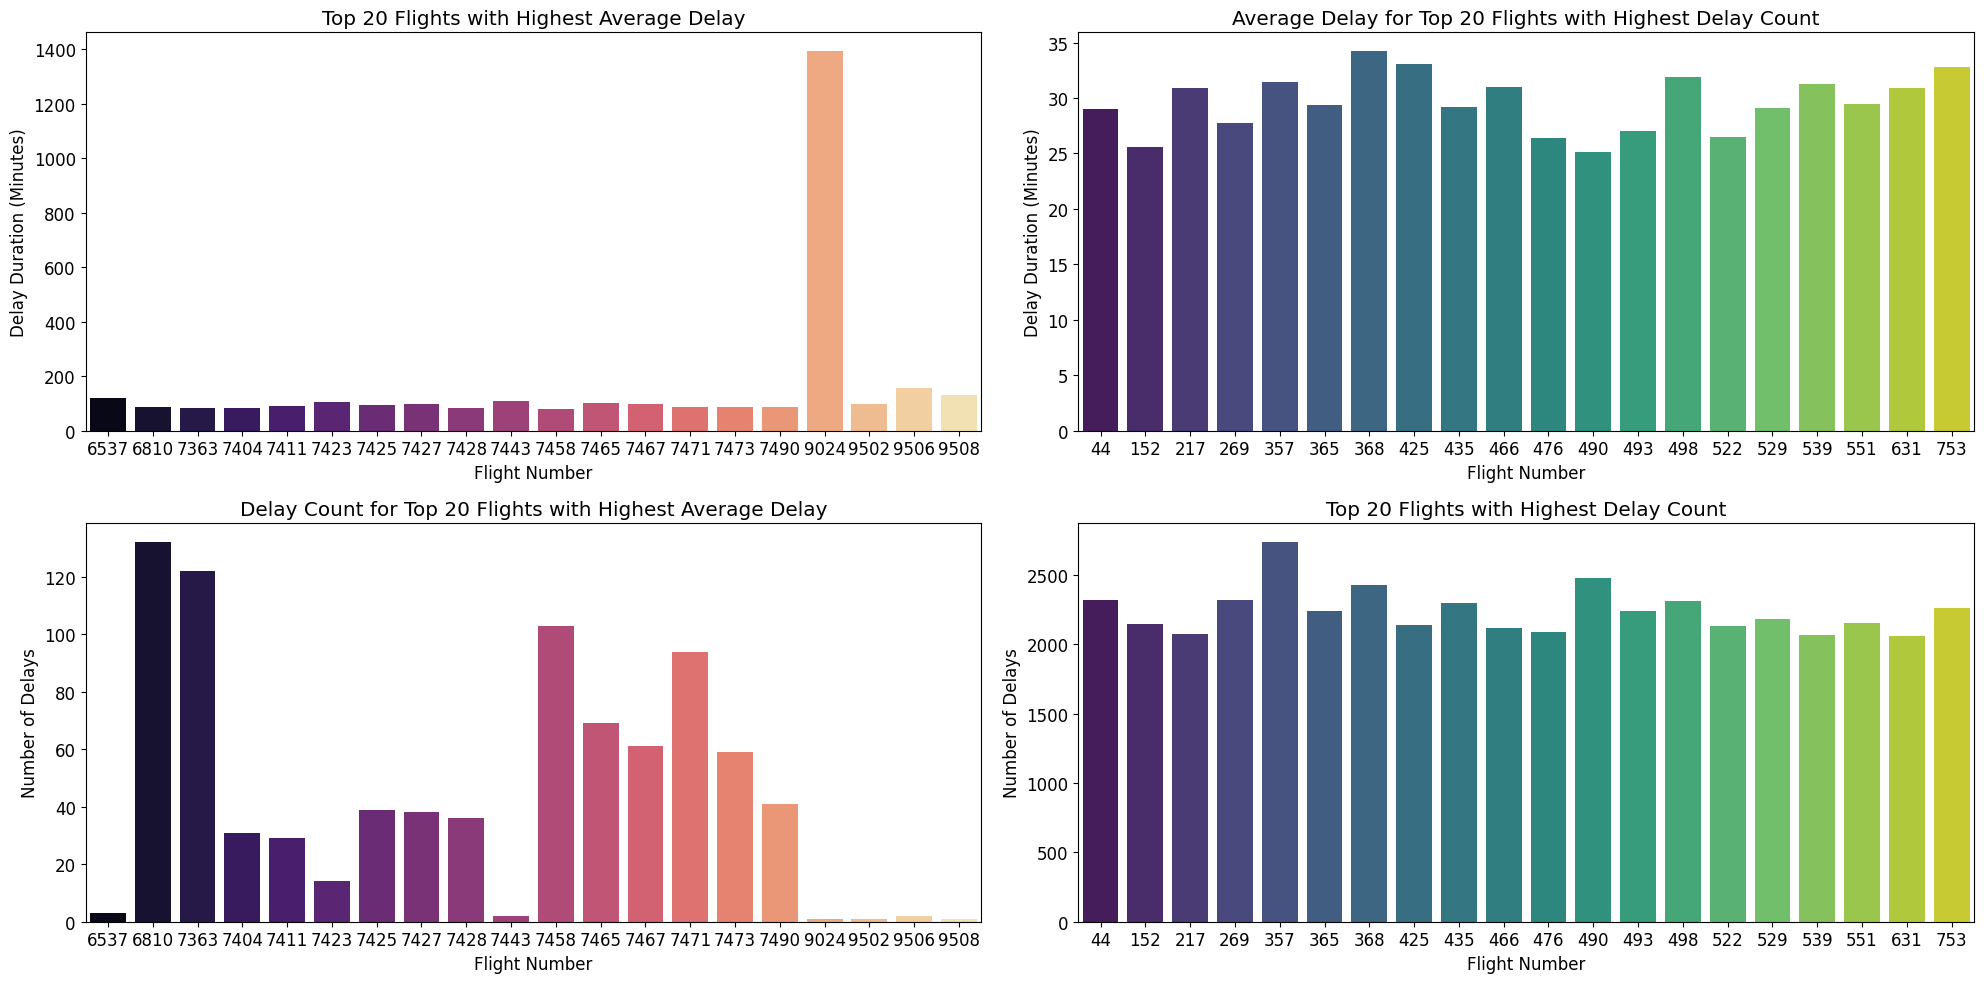

In [33]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 12, 'lines.markersize': 10})

plt.subplot(2, 2, 1)
sns.barplot(data=top_20_avg_delays, y='avg_arrdelay', x='flightnum', palette='magma')
plt.title('Top 20 Flights with Highest Average Delay')
plt.ylabel('Delay Duration (Minutes)')
plt.xlabel('Flight Number')

plt.subplot(2, 2, 2)
sns.barplot(data=top_20_delays, y='avg_arrdelay', x='flightnum', palette='viridis')
plt.title('Average Delay for Top 20 Flights with Highest Delay Count')
plt.ylabel('Delay Duration (Minutes)')
plt.xlabel('Flight Number')

plt.subplot(2, 2, 3)
sns.barplot(data=top_20_avg_delays, y='delay_count', x='flightnum', palette='magma')
plt.title('Delay Count for Top 20 Flights with Highest Average Delay')
plt.ylabel('Number of Delays')
plt.xlabel('Flight Number')

plt.subplot(2, 2, 4)
sns.barplot(data=top_20_delays, y='delay_count', x='flightnum', palette='viridis')
plt.title('Top 20 Flights with Highest Delay Count')
plt.ylabel('Number of Delays')
plt.xlabel('Flight Number')

plt.tight_layout()
plt.show();

### **Cancel Count based on Flight Number**

- Top 40 Flights with Highest Cancellations

The next plot shows the top 40 flight numbers with the highest delay counts. It is suggested to avoid all of these flight numbers but most importantly, based on the plot, flight numbers 20, 30 and 25 should be avoided as the cancellation count surpasses 100 times in the year 2006 which means that flight cancellations occur at least once every 4 days.

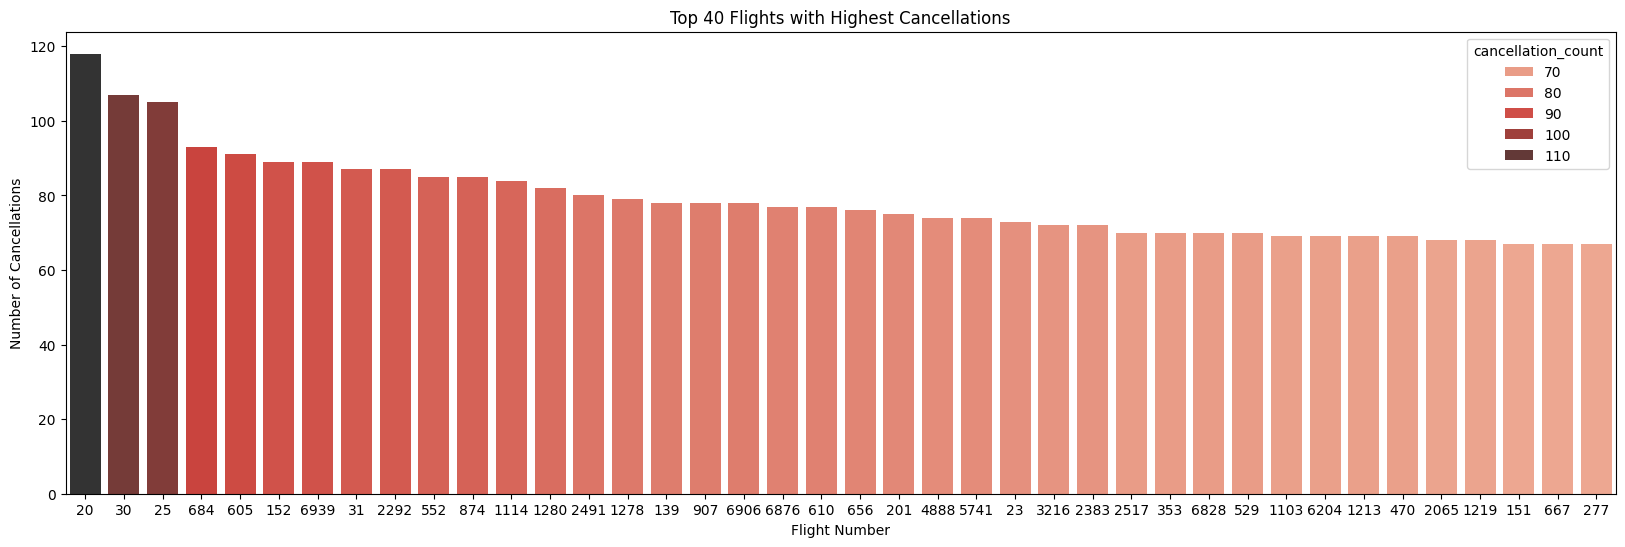

In [13]:
plt.figure(figsize=(20, 6))
plt.rcParams.update({'font.size': 10, 'lines.markersize': 10})

sns.barplot(data=top_40_cancellations, y='cancellation_count', x='flightnum', palette='Reds_d', hue = 'cancellation_count')
plt.title('Top 40 Flights with Highest Cancellations')
plt.ylabel('Number of Cancellations')
plt.xlabel('Flight Number')

plt.show();

### **Flight Cancellation Insights by Month**

The two plots below shows the total number of flights cancelled and the average for each month side by side. Based on the left plot, August, July and October have the highest cancellation count but when looking at the right plot for the average, December comes first followed by February and October. From this analysis, October seems to be the worst month to fly in as it has the highest number of cancellations while also being high on average. December should also be avoided because although there are fewer cancellations, the average (2.99%) is a lot higher than the second highest average (2.13%).

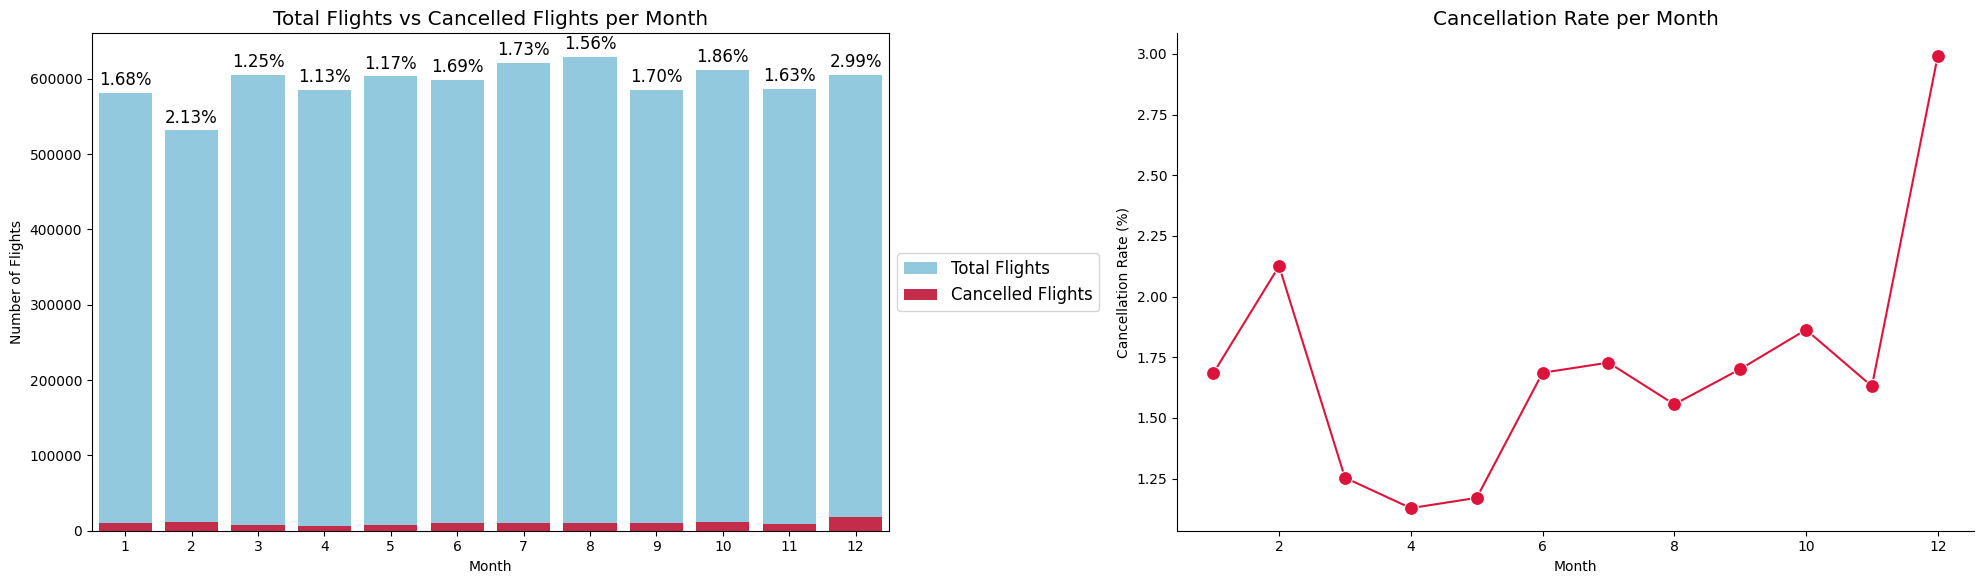

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
plt.rcParams.update({'font.size': 12, 'lines.markersize': 10})

# plot 1
sns.barplot(x='month', y='total_flights', data=avg_cancel_month, color='skyblue', label='Total Flights', ax=axs[0])
sns.barplot(x='month', y='cancelled_flights', data=avg_cancel_month, color='crimson', label='Cancelled Flights', ax=axs[0])

for i in range(len(avg_cancel_month)):
    axs[0].text(i, avg_cancel_month['total_flights'][i] + 5000, f"{avg_cancel_month['cancellation_rate'][i]:.2f}%", ha='center', va='bottom')

axs[0].set_title('Total Flights vs Cancelled Flights per Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Flights')
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plot 2
sns.lineplot(x='month', y='cancellation_rate', data=avg_cancel_month, marker='o', ax=axs[1], color='crimson')

axs[1].set_title('Cancellation Rate per Month')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Cancellation Rate (%)')
axs[1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

### **Delay and Cancellation Rate by Carrier**

- Average arrival delay in minutes by carrier
- Average cancel count by carrier

The plots below show which carriers to avoid using as they have the highest average arrival delay/cancellation rate. The two worst carriers in terms of delay are TZ (ATA Airlines) and EV (Atlantic Southeast Airlines) both recording an average above 14 minutes meanhwile the two worst carriers in terms of frequent cancellations are MQ (American Eagle Airlines Inc.) and YV (Mesa Airlines Inc.) with a record of more than 3% cancellation rate.

<ipython-input-15-c2be7f229cff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='avg_arrdelay', x='uniquecarrier', data=top10_avg_delay_carrier, palette='Blues_d', ax=axs[0])
<ipython-input-15-c2be7f229cff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='cancellation_rate', x='uniquecarrier', data=top10_avg_cancel_carrier, palette='Reds_d', ax=axs[1])


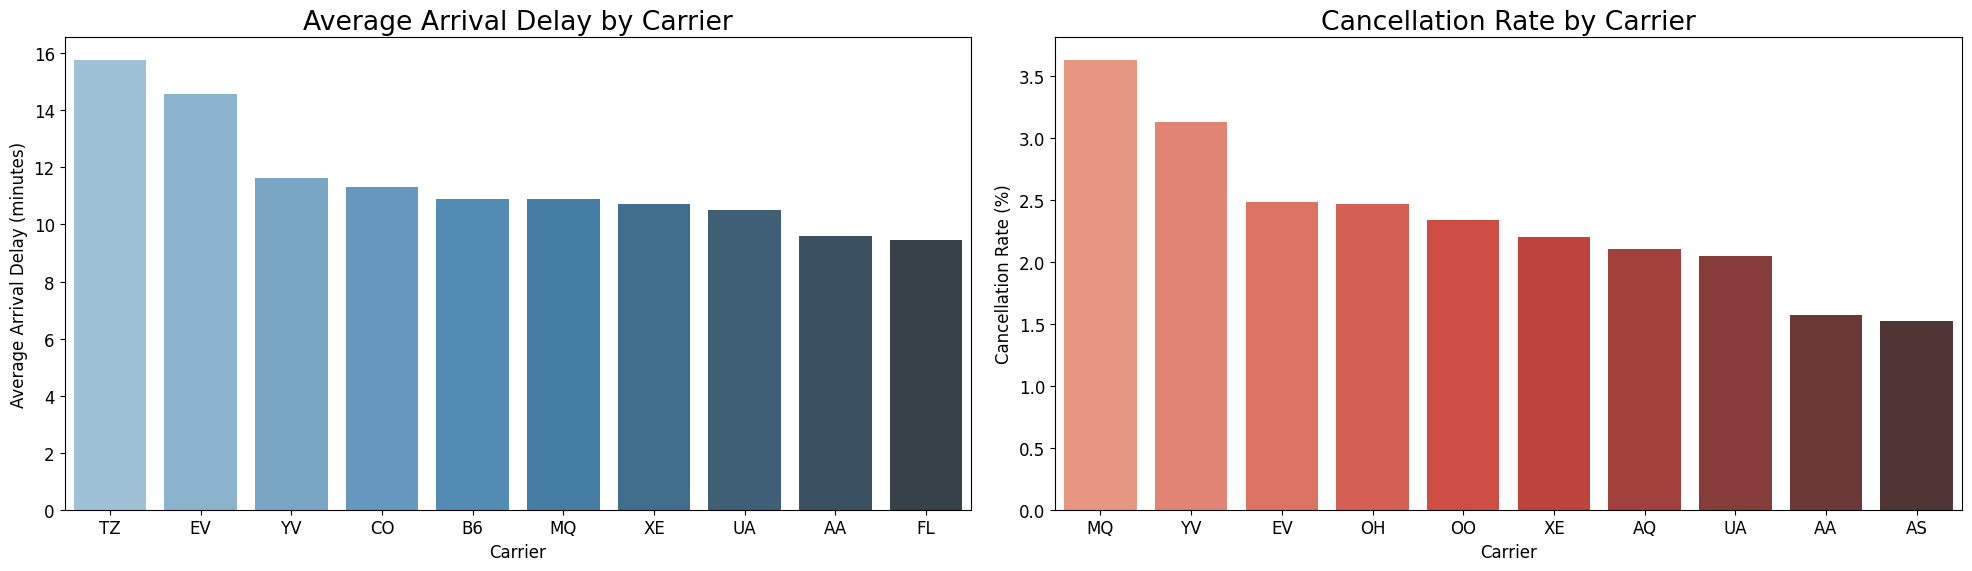

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
plt.rcParams.update({'font.size': 16, 'lines.markersize': 10})

# avg_arrdelay by carrier
sns.barplot(y='avg_arrdelay', x='uniquecarrier', data=top10_avg_delay_carrier, palette='Blues_d', ax=axs[0])
axs[0].set_title('Average Arrival Delay by Carrier')
axs[0].set_ylabel('Average Arrival Delay (minutes)')
axs[0].set_xlabel('Carrier')

# cancellation_rate by carrier
sns.barplot(y='cancellation_rate', x='uniquecarrier', data=top10_avg_cancel_carrier, palette='Reds_d', ax=axs[1])
axs[1].set_title('Cancellation Rate by Carrier')
axs[1].set_ylabel('Cancellation Rate (%)')
axs[1].set_xlabel('Carrier')

plt.tight_layout()
plt.show()

To conclude from the analysis part, there are pretty clear-cut guides on which times to avoid flying and which carriers to avoid purchasing tickets from. The analysis above may be used as a guide to make better and informed decisions when purchasing flight tickets be it for business or for individuals.

# **Logistic Regression Model**

Below is the logistic regression model trained to predict whether a flight will get cancelled or delayed based on the features:

- scheduled departure time
- scheduled arrival time
- date (month and day)
- flight distance

First, a new column is created to compile flights that have been cancelled or delayed. The new column is called 'DelayedOrCancelled'. Then the logistic model is trained. The model assumes linear relationship bewteen variables and is considered a simple/non-complex model compared to other statistical or machine learning models. The performance of the model is identified using the accuracy score which is how accurate the model predicted the values for the testing data. The accuracy score of the model below is 58% which is low and can be due to the non-complexity of model. A better model that might be able to capture the patterns that may not be captured by the logistic regression model might require more computational cost. However, for the sake of predicting the chances a flight would get cancelled or delayed, the model below will be used.

The model below captures non delayed or cancelled flights accurately 81% of the time but fails to identify delayed or cancelled flights 69% of the time. Predictions using the model below may be inaccurate and may indicate purchasing a ticket during a certain period is okay but the flight may also have a chance of getting cancelled or delayed. It is best to use the model below just as a guide when choosing time to fly.

In [16]:
conditions = ((flights['Cancelled'] == 1) |
              (flights['CarrierDelay'] > 0) |
              (flights['WeatherDelay'] > 0) |
              (flights['NASDelay'] > 0) |
              (flights['SecurityDelay'] > 0) |
              (flights['LateAircraftDelay'] > 0))

flights['DelayedOrCancelled'] = conditions.astype(int)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [18]:
features = flights[['CRSDepTime', 'CRSArrTime', 'DayofMonth', 'Month', 'Distance']]
target = flights['DelayedOrCancelled']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123)

In [19]:
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [20]:
logistic_model = LogisticRegression(class_weight='balanced', max_iter=500)
logistic_model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=500)

In [21]:
y_pred = logistic_model.predict(X_test)

In [22]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}');

Accuracy: 0.58


In [24]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix);

Confusion Matrix:
[[917728 702124]
 [206874 315851]]


In [25]:
# Print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report);

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67   1619852
           1       0.31      0.60      0.41    522725

    accuracy                           0.58   2142577
   macro avg       0.56      0.59      0.54   2142577
weighted avg       0.69      0.58      0.61   2142577



The model is tested below using synthetic data:

In [26]:
features

,CRSDepTime,CRSArrTime,DayofMonth,Month,Distance
0,745,1018,11,1,1587
1,1053,1318,11,1,1587
2,1915,2133,11,1,1587
3,1755,1933,11,1,872
4,832,1015,11,1,872
...,...,...,...,...,...
7141917,1249,1459,29,12,745
7141918,1155,1931,29,12,2182
7141919,2115,2241,29,12,403
7141920,2127,2223,29,12,585


In [27]:
predict_1 = {
    'CRSDepTime': [1159, 2310, 930, 1140],
    'CRSArrTime': [1600, 130, 1425, 2050],
    'DayofMonth': [30, 14, 5, 23],
    'Month': [8, 12, 2, 6],
    'Distance': [1587, 745, 2182, 2558]
}

predict_df = pd.DataFrame(predict_1)

In [28]:
prediction_results = logistic_model.predict(predict_df)
prediction_results

array([0, 1, 0, 1])